## Data Science Python Project

Brian Kurniawan

Region Introduction

The 'Hot Rod' region features North America and Part of Latin America. Interestingly, Spanish and English are portrayed as the languages of the Latin American and North American regions. However, these regions actually feature over 900 spoken languages(Sounds and Colours, 2020). The Latin American culture is known for its passion of expression through such as its use of vibrant colors, cinema, music, and dance styles, such as the samba and salsa style (Inicio, 2020). 

It's unique cultural heritage is filled with all sorts of different traditions symbolising various aspects of life such as the Guelaguetza Festival celebrating arts and dance or the celebration of death called Día de Muertos (Zimmermenn, 2017). Mexico in particular is best known for their delicious food such as tacos, burritos, and nachos, and their world famous tequila. As of 2019, Mexico exported 224.1 million litres of tequila worldwide contributing to more than 70 % of the overall GDP of Mexico (Statista, 2019).

In the past decades, Mexico has come as the leader between Latin America countries with strong macroeconomics, low inflation, and high international markets (Organization for Economic Co-Operation and Development, 2015), 2015). Mexico is known as the host of many modern firms, especially in automobiles, aerospace, Food & Beverages manufacturer, and provides a very highly skilled and educated work force. Mexico's government has placed a comprehensive program to improve the skills of all people, including boosting education level. This program has been a long-time economic project to ensure companies around the world which will prioritize Mexico as their long-term partner. 

In [2]:
"""
docstring:

A dateset with 217 countries has been analyzed. The Focus of the analysis is Mexico.
To work with this dataset in this report, several steps have to be performed in advance 
such as importing packages, reading the file, setting filters etc.

The report is structured in four parts:

- Region Introduction
- Correlation
- Histogram (Distribution)
- Boxplots
- Conclusion

Since for every part different steps had to be performed before creating the relevant graphs,
every part of the code starts different (e.g. setting different filters, filling
in missing values etc.). 

"""


# importing packages
import numpy as np
import os
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # NEW: data visualization essentials
import seaborn as sns # NEW: enhanced data visualization
import matplotlib as py


# converting data types with a dictionary
data_types = {"counrty_code _total" : str,
              "country_name":str,
              "Hult_Region" : str,
              "cool_name": str}


# specifying the file
file = "./Final_Project_Dataset.xlsx"


# reading the file into Python through pandas
Data = pd.read_excel(io = file, 
                        sheet_name = "Data",
                         header = 0,
                         dtype = data_types)

#filling in the mean for missing values
data_mean = Data.fillna(np.mean(Data))

#filter the dataseat for our specific 'Hot Rod' Region and round it to two decimals
#create fot this specific filter a 
data_mean_filter = data_mean.loc[:,:][data_mean.loc[:,'Cool Name']== 'Hot Rod'].round(2)

#filter for 'Hot Rod' region and display only values for country name = Mexico
data_mean_mexico= data_mean.loc[:,:][data_mean.loc[:,'Cool Name']== 'Hot Rod']\
            [data_mean.loc[:,'Country Name'] == 'Mexico'].round(2)

#create another dataframe of the data called 'df'
df=pd.DataFrame(Data)

# filling in the missing variables with the mean 
df_mean=Data.fillna(np.mean(Data))

#create filter based on the hot rod name 
filt=(df["Cool Name"]=="Hot Rod")

<ipython-input-2-466c703eaf78>:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_mean_mexico= data_mean.loc[:,:][data_mean.loc[:,'Cool Name']== 'Hot Rod']\


## CORRELATIONS

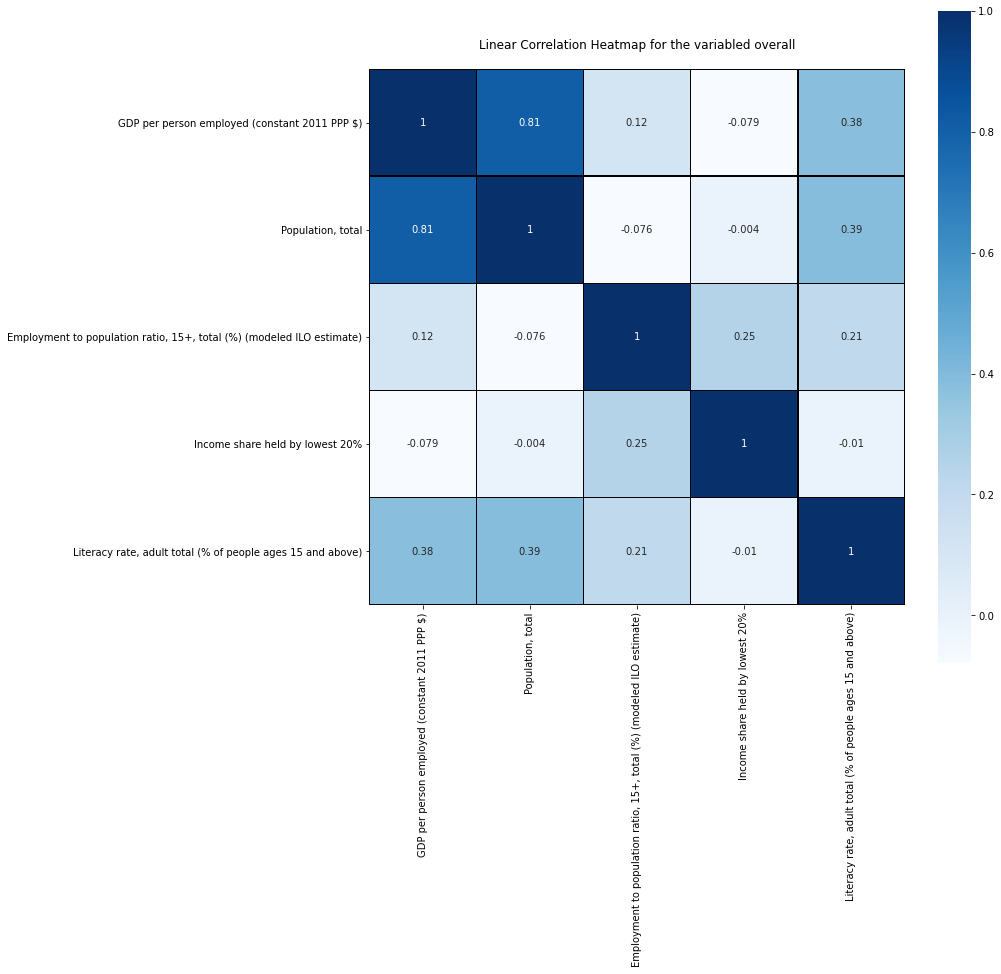

In [3]:
#extracting just the collums we want to correlate using the filter method
core_df=Data[["GDP per person employed (constant 2011 PPP $)",\
                "Population, total","Employment to population ratio, 15+, total (%) (modeled ILO estimate)",\
                "Income share held by lowest 20%","Literacy rate, adult total (% of people ages 15 and above)"]]
#using the interpolation method to fill in missing values  
inter=core_df.fillna(core_df.interpolate(method="linear",limit_area="inside",limit=1))
#using medial to fill in the values that interpolation can not fill in 
final_df=inter.fillna(core_df.median())
final_df

#filtering the data set based on our cool name which is hotrod
filt=(df["Cool Name"]=="Hot Rod")
#using the filtered method with 2 decimal places then using the fuction mae to call it 
reg=final_df[filt].round(decimals=3)

#using pearsons correlation method to find relationships with the chosen variables
correlation_df=reg.corr(method="pearson").round(decimals=3)

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(12,12))


# developing a spicy heatmap
sns.heatmap(data       = correlation_df, # the correlation matrix
            cmap       = 'Blues',     # changing to nutural colrs 
            square     = True,          # tightening the layout
            annot      = True,          # numbers in the heat map 
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.6)          # thickness of the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for the variabled overall
""")
plt.show()


Analysis

The interpolation method was used to fill in the missing variables. This method fills in the values with a close approximation of a value in between those 2 points, however interpolation is lacking as it does not fully fill in all the values thus we used median method to fill in the rest of the values. This way we are not getting all similar values which if we used only mean/median would be inevitable and then our correlation would not make much sense.

We have picked variables GDP, population, employment, income and education from the dataset. As we can see from the correlation the GDP of any country is related to its levels of population as it reflects a countries growth the output produced when there are more people. This is why the relationship that we observe is of 0.81 meaning a positive linear correlation between GDP and the population of the country.

Secondly we have the number of employed people who hold the majority of the income earned in the county, positively correlated with a number of 0.12, they also share a positive correlation with the level of GDP as they are the ones who are producing good and services in the country. Also it is important to mention that the level of employment is negatively correlated (-0.076) with the over all population, because as the population growth saturates the jobs market and decreased the jobs, available as there are too many workers seeking for work. This is especially true for underdeveloped countries such as Mexico where there is a large population density and low jobs.

Lastly, we have a major topic which is the literacy rate in which shows a positive correlation to the population as low income families tend to have more children as they want their children to work and support the whole family. Such is the case with underdeveloped countries in the world. Additional these people generally take physical labor jobs in the country which contributes to the overall GDP growth of the country which is also why literacy rate shows a positive correlation with GDP.


## HISTOGRAMS

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

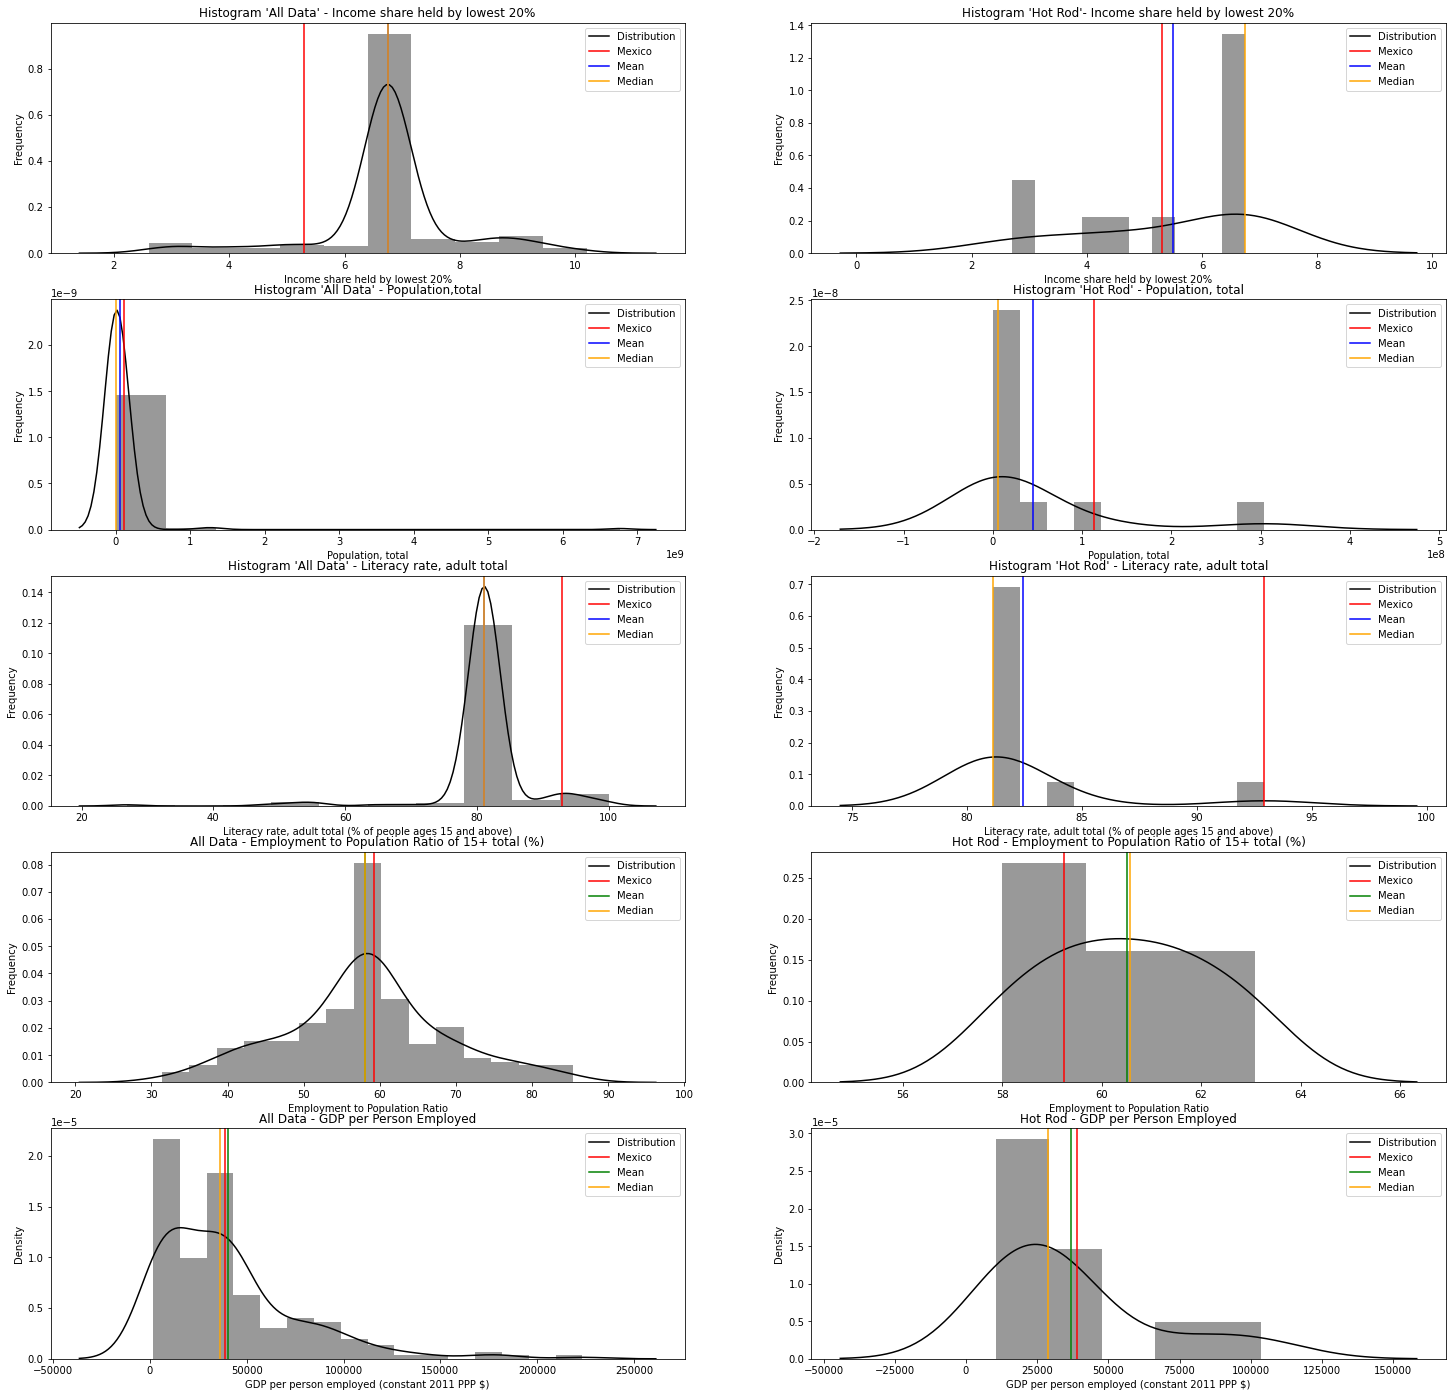

In [16]:
# histogram filitering
# mean mexico income
mexico_mean_income = data_mean_mexico.loc[:,'Income share held by lowest 20%'][data_mean_mexico['Country Name'] == 'Mexico']


# mean mexico population total
mexico_mean_population_total = data_mean_mexico.loc[:,'Population, total'][data_mean_mexico['Country Name'] == 'Mexico']

# mean mexico literacy rate
mexico_mean_literacy = data_mean_mexico.loc[:,'Literacy rate, adult total (% of people ages 15 and above)'][data_mean_mexico['Country Name'] == 'Mexico']

#mean mexico employment 15+ total
mexico_mean_empoyment_total = data_mean_mexico.loc[:,'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'][data_mean_mexico['Country Name'] == 'Mexico']

#mean mexico employment 15+ female
mexico_mean_empoyment_female = data_mean_mexico.loc[:,'Employment to population ratio, 15+, female (%) (modeled ILO estimate)'][data_mean_mexico['Country Name'] == 'Mexico']

#mean mexico employment 15+ male
mexico_mean_empoyment_male = data_mean_mexico.loc[:,'Employment to population ratio, 15+, male (%) (modeled ILO estimate)'][data_mean_mexico['Country Name'] == 'Mexico']

#mean mexico GDP per person employed
mexico_mean_GDP = data_mean_mexico.loc[:,'GDP per person employed (constant 2011 PPP $)'][data_mean_mexico['Country Name'] == 'Mexico']

#mean mexico self-employed
mexico_mean_self_employed = data_mean_mexico.loc[:,'Self-employed, total (% of total employment)'][data_mean_mexico['Country Name'] == 'Mexico']

#histograms
#Setting figure size
fig, ax = plt.subplots(figsize = [25, 50])


###########################
## Plotting First Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 1)


# No. 1
sns.distplot(a     = data_mean['Income share held by lowest 20%'],
             bins  = 10,
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')

# Add vertical lines to the code with Mexico data to compare it to others
# plt.axvline(x = data_mean_mexico.loc[124, 'Income share held by lowest 20%'], color='red')
plt.axvline(x = mexico_mean_income.mean(), color='red')

plt.axvline(x = data_mean['Income share held by lowest 20%'].mean(),color = 'blue')

plt.axvline(x = data_mean['Income share held by lowest 20%'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])
        
# titles and axis labels
plt.title(label = "Histogram 'All Data' - Income share held by lowest 20%")
plt.xlabel(xlabel = 'Income share held by lowest 20%')
plt.ylabel(ylabel = 'Frequency')


###########################
## Plotting Second Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 2) 


# No. 2
sns.distplot(a     = data_mean_filter['Income share held by lowest 20%'],
             bins  = 10,
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# Add vertical lines to the code with Mexico data to compare it to others
plt.axvline(x = mexico_mean_income.mean(), color='red')

plt.axvline(x = data_mean_filter['Income share held by lowest 20%'].mean(),color = 'blue')

plt.axvline(x = data_mean_filter['Income share held by lowest 20%'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])

# titles and axis labels
plt.title(label = "Histogram 'Hot Rod'- Income share held by lowest 20%")
plt.xlabel(xlabel = 'Income share held by lowest 20%')
plt.ylabel(ylabel = 'Frequency')


############################
## Plotting Third Visual ##
############################

# plot area 3
plt.subplot(10, 2, 3) 


# No. 3
sns.distplot(a     = data_mean['Population, total'],
             bins  = 10,
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')

# Add vertical lines to the code with Mexico data to compare it to others
#plt.axvline(x = data_mean_mexico.loc[124,'Population, total'], color='red')
plt.axvline(x = mexico_mean_population_total.mean(), color = 'red')

plt.axvline(x = data_mean['Population, total'].mean(),color = 'blue')

plt.axvline(x = data_mean['Population, total'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])

# # titles and axis labels
plt.title(label = "Histogram 'All Data' - Population,total")
plt.xlabel(xlabel = 'Population, total')
plt.ylabel(ylabel = 'Frequency')

############################
## Plotting Fourth Visual ##
############################

# plot area 4
plt.subplot(10, 2, 4) 


# No. 4
sns.distplot(a     = data_mean_filter['Population, total'],
             bins  = 10,
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# Add vertical lines to the code with Mexico data to compare it to others
#plt.axvline(x = data_mean_mexico.loc[124,'Population, total'], color='red')
plt.axvline(x = mexico_mean_population_total.mean(), color = 'red')

plt.axvline(x = data_mean_filter['Population, total'].mean(),color = 'blue')

plt.axvline(x = data_mean_filter['Population, total'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])


# # titles and axis labels
plt.title(label = "Histogram 'Hot Rod' - Population, total")
plt.xlabel(xlabel = 'Population, total')
plt.ylabel(ylabel = 'Frequency')

###########################
## Plotting Fifth Visual ##
###########################

# plot area 
plt.subplot(10, 2, 5) # 3 rows, 2 column, space 3


# No. 5
sns.distplot(a     = data_mean['Literacy rate, adult total (% of people ages 15 and above)'],
             bins  = 10,
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# Add vertical lines to the code with Mexico data to compare it to others
# plt.axvline(x = data_mean_mexico.loc[124,'Literacy rate, adult total (% of people ages 15 and above)'], color='red')
plt.axvline(x= mexico_mean_literacy.mean(), color = 'red')

plt.axvline(x = data_mean['Literacy rate, adult total (% of people ages 15 and above)'].mean(),color = 'blue')

plt.axvline(x = data_mean['Literacy rate, adult total (% of people ages 15 and above)'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])


# titles and axis labels
plt.title(label = "Histogram 'All Data' - Literacy rate, adult total")
plt.xlabel(xlabel = 'Literacy rate, adult total (% of people ages 15 and above)')
plt.ylabel(ylabel = 'Frequency')



###########################
## Plotting Sixth Visual ##
###########################

# plot area 6
plt.subplot(10, 2, 6)


# No. 6
sns.distplot(a     = data_mean_filter['Literacy rate, adult total (% of people ages 15 and above)'],
             bins  = 10,
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# Add vertical lines to the code with Mexico data to compare it to others
# plt.axvline(x = data_mean_mexico.loc[124,'Literacy rate, adult total (% of people ages 15 and above)'], color='red')
plt.axvline(x= mexico_mean_literacy.mean(), color = 'red')

plt.axvline(x = data_mean_filter['Literacy rate, adult total (% of people ages 15 and above)'].mean(),color = 'blue')

plt.axvline(x = data_mean_filter['Literacy rate, adult total (% of people ages 15 and above)'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])


# titles and axis labels
plt.title(label = "Histogram 'Hot Rod' - Literacy rate, adult total")
plt.xlabel(xlabel = 'Literacy rate, adult total (% of people ages 15 and above)')
plt.ylabel(ylabel = 'Frequency')

###########################
## Plotting Seventh Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 7)  # 8 rows, 2 columns, space 1


# No.1
sns.distplot(a     = data_mean['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'],
             bins  = 'fd',
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# titles and axis labels
plt.title(label = "All Data - Employment to Population Ratio of 15+ total (%)")
plt.xlabel(xlabel = 'Employment to Population Ratio')
plt.ylabel(ylabel = 'Frequency')

# Add vertical lines to the code with Mexico data to compare it to others

plt.axvline(x= mexico_mean_empoyment_total.mean(), color = 'red')

plt.axvline(x = data_mean['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].mean(),color = 'green')

plt.axvline(x = data_mean['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])


###########################
## Plotting Eighth Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 8)  # 8 rows, 2 columns, space 2


# No.2
sns.distplot(a     = data_mean_filter['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'],
             bins  = 'fd',
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# titles and axis labels
plt.title(label = "Hot Rod - Employment to Population Ratio of 15+ total (%)")
plt.xlabel(xlabel = 'Employment to Population Ratio')
plt.ylabel(ylabel = 'Frequency')

# Add vertical lines to the code with Mexico data to compare it to others

plt.axvline(x= mexico_mean_empoyment_total.mean(), color = 'red')

plt.axvline(x = data_mean_filter['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].mean(),color = 'green')

plt.axvline(x = data_mean_filter['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])


###########################
## Plotting Nineth Visual ##
###########################

# plot area 7
plt.subplot(10, 2, 9) # 8 rows, 2 column, space 7



sns.distplot(a     = data_mean['GDP per person employed (constant 2011 PPP $)'],
             bins  = 'fd',
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# titles and axis labels
plt.title(label = "All Data - GDP per Person Employed")
plt.xlabel(xlabel = 'GDP per person employed (constant 2011 PPP $)')
plt.ylabel(ylabel = 'Density')

# Adding vertical lines to the code
plt.axvline(x= mexico_mean_GDP.mean(), color = 'red')

plt.axvline(x = data_mean['GDP per person employed (constant 2011 PPP $)'].mean(),color = 'green')

plt.axvline(x = data_mean['GDP per person employed (constant 2011 PPP $)'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])


###########################
## Plotting Tenth Visual ##
###########################

# plot area 8
plt.subplot(10, 2, 10) # 8 rows, 2 column, space 8



sns.distplot(a     = data_mean_filter['GDP per person employed (constant 2011 PPP $)'],
             bins  = 'fd',
             hist  = True,
             kde   = True,
             rug   = False,
             color = 'black')


# titles and axis labels
plt.title(label = "Hot Rod - GDP per Person Employed")
plt.xlabel(xlabel = 'GDP per person employed (constant 2011 PPP $)')
plt.ylabel(ylabel = 'Density')

# Adding vertical lines to the code
plt.axvline(x= mexico_mean_GDP.mean(), color = 'red')

plt.axvline(x = data_mean_filter['GDP per person employed (constant 2011 PPP $)'].mean(),color = 'green')

plt.axvline(x = data_mean_filter['GDP per person employed (constant 2011 PPP $)'].median(),color = 'orange')

# this adds a legend
plt.legend(labels =  ['Distribution', 'Mexico', 'Mean', 'Median'])


# compile and display the plot so that it is formatted as expected
plt.show()

## Analysis

Throughout the use of different methods, we found out that replacing missing values with the mean is the best approach for this analysis.

The world's income share held by the lowest 20% shows nearly a normal distribution with a mean of 6.75, which decreases for the 'Hot Rod' region to 5.49. This indicates that the region struggles with a huge gap between poor and rich people. Mexico can show continuous growth since 1980 and represents the region excellent on average with 5.3%, but compared to the whole world, it is far below the mean (The Economics, 2020).

Mexico features the largest population of approximately 113.6 million. This is close to the world's mean, but represents almost three times the mean of its region. However, it needs to be considered that Mexico is also area-wise the largest country in Latin America.

By analyzing the literacy rate, the world shows a mean of 81.12%, while the 'Hot Rod' area has a mean of 82.45%, which indicates that the region's education system is better developed than the rest of the worlds. Mexico undermines this statement with its rate of 92.93%. This can be explained by Mexico's enormous investments in the public school system to strengthen education (Monroy, 2020).

Mexico's employment to population ratio has experienced “minimal” fluctuations in the past 4 years moving from 58.1% in 2015 to 58.4% in 2020 (World Bank, 2020). As observed from the data, Mexico performs slightly better than the world (with medians of 59.25 compared to 58) and is placed slightly lower (median of 59.25 < 60.57) than its regional counterparts despite its labor force participation gender gap (44.2% women to 78.5% men). If Mexico works to close this gap by increasing women's labor force participation, they would raise Mexico's GDP by 70% ($800 billion).

Despite Mexico's highly informal labor sector its median levels of productivity are above world's GDP per person employed median of 39046.59 and Mexico's at 36252.16. It is interesting to note that the mean GDP per person employed (40128.65) for the world is higher than Mexico's. Mexico is also doing better in terms of productivity compared to the Hot Rod region with a median GDP per person employed of 28952.9 and a mean of 36761.91.

## BOXPLOTS

Text(0, 0.5, 'Region Name')

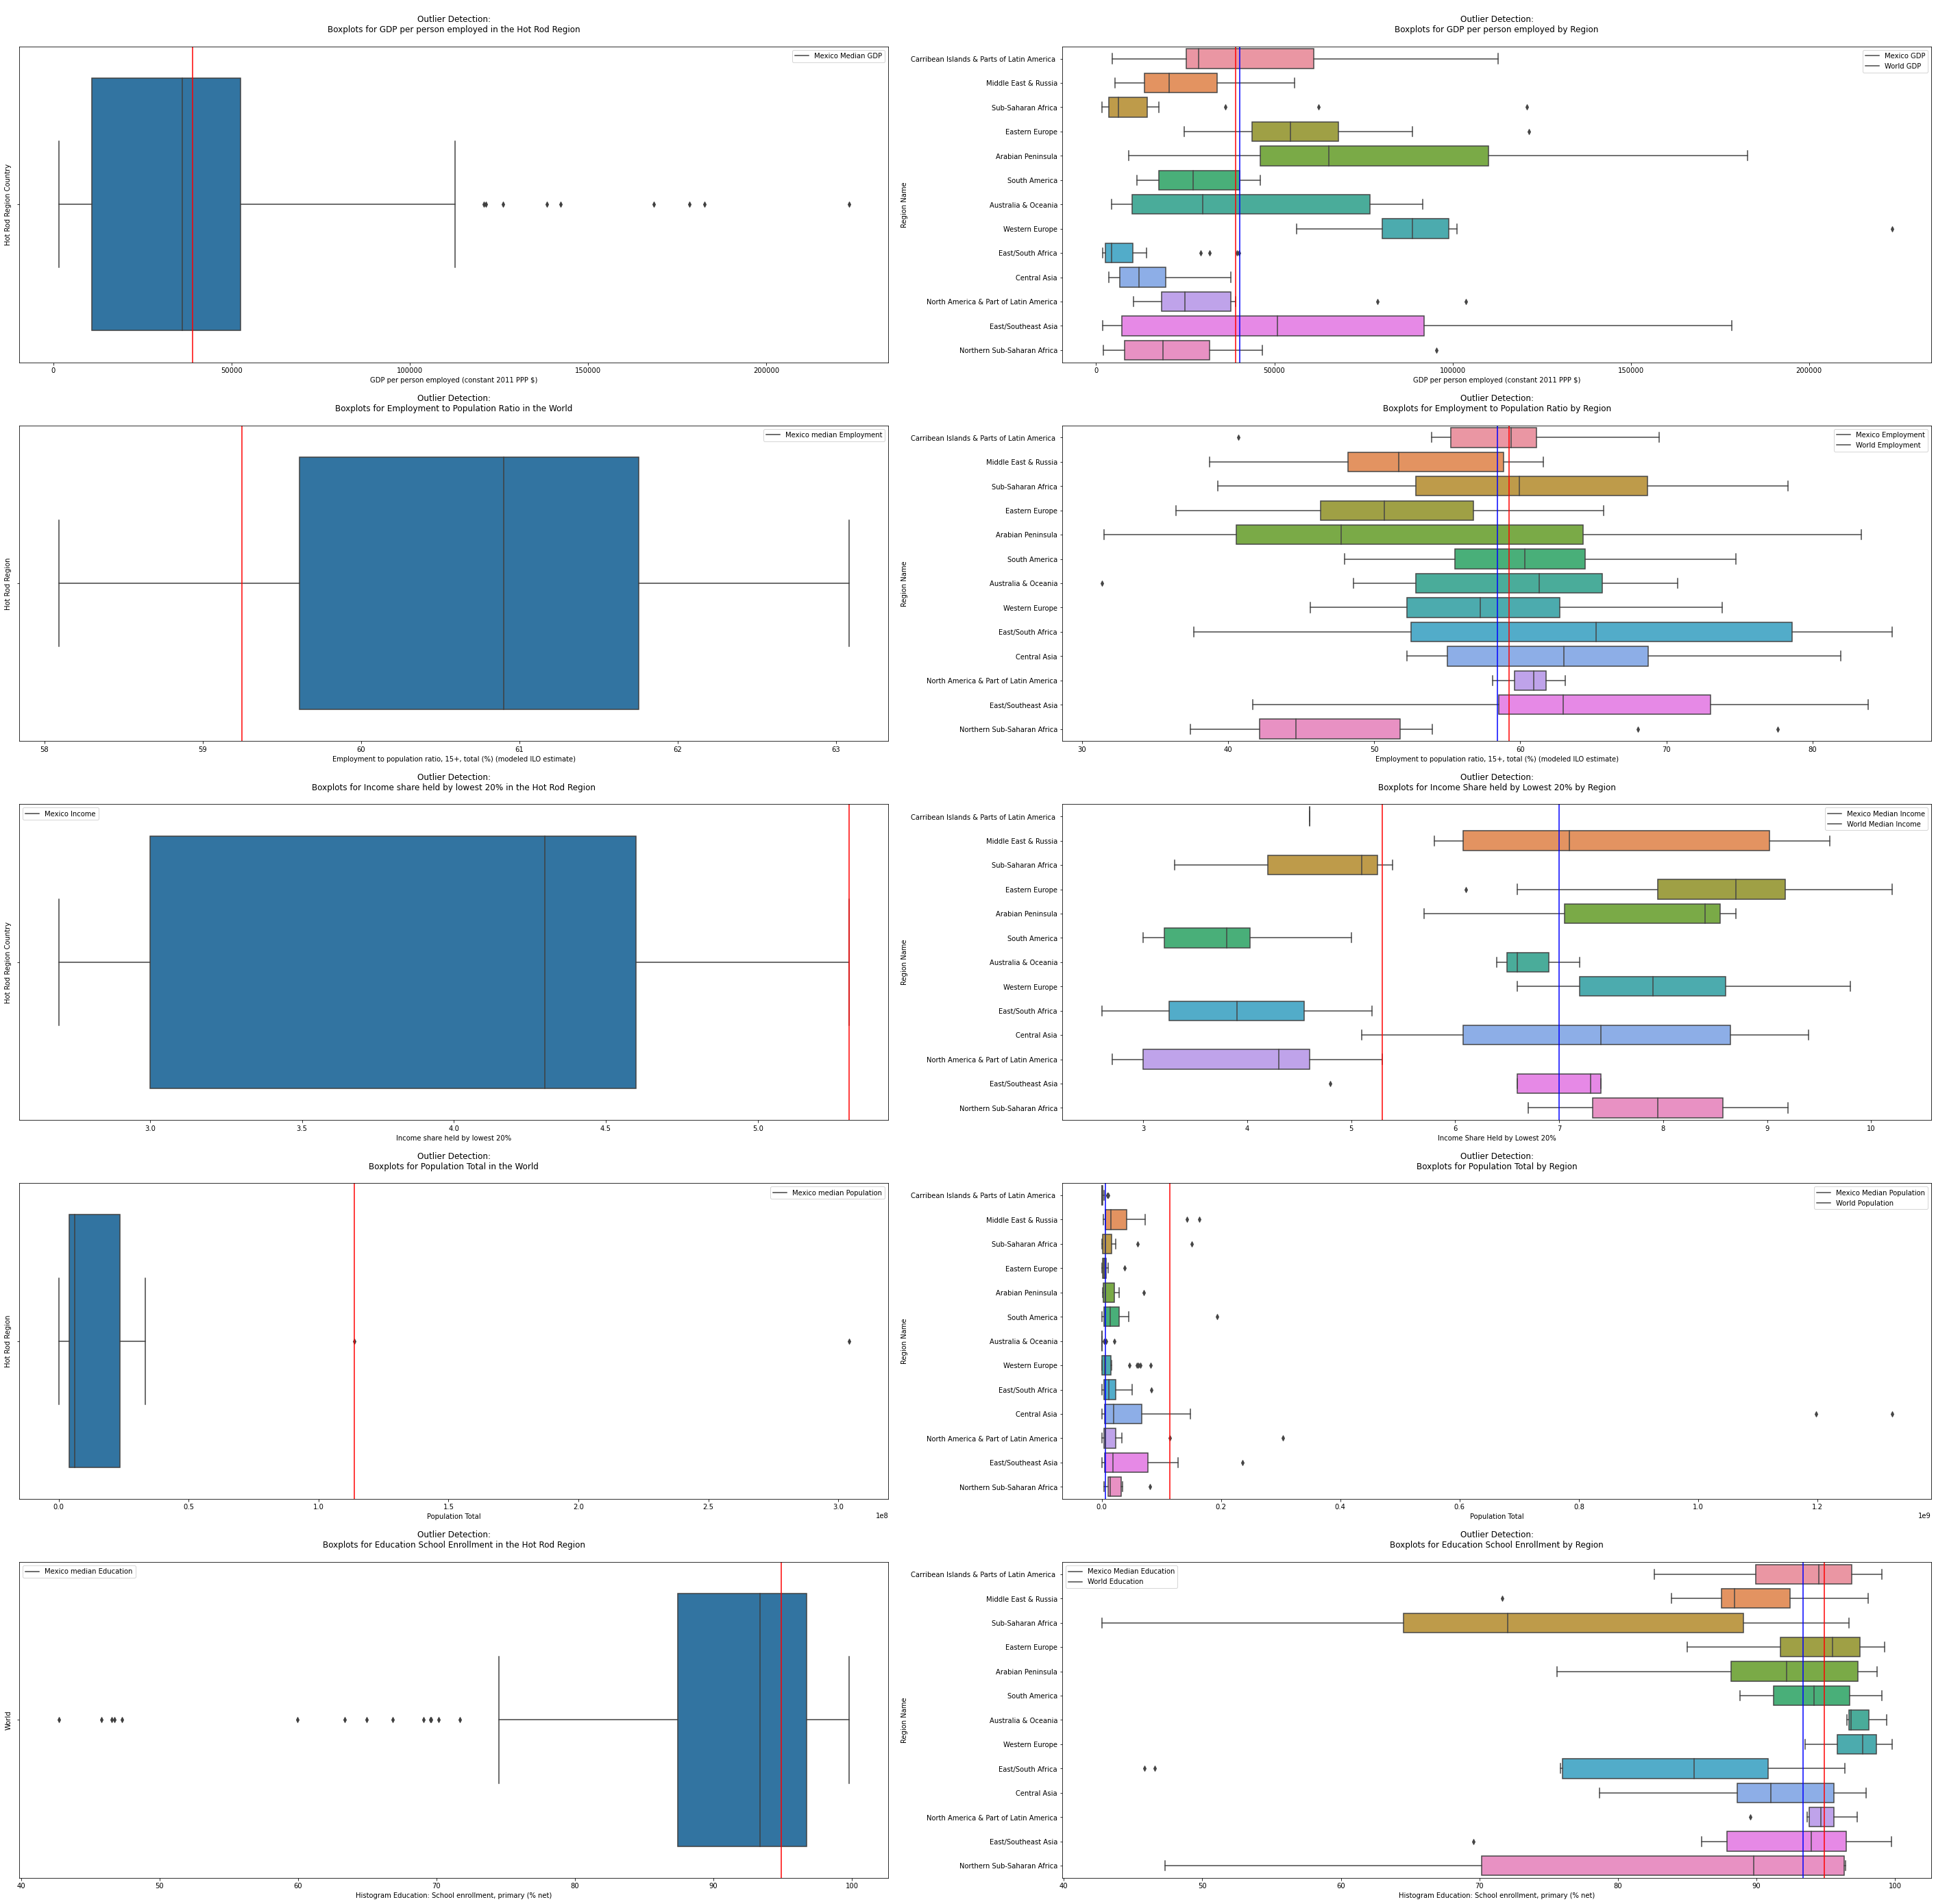

In [19]:
#dropping  world row
df_new = df.loc[:,:][df["Country Name"] != "World"]

# filtering the data for hot rod cool name
data_hotrod = Data.loc[:,:][Data["Cool Name"] == "Hot Rod"]

#finding the median values for hotrod
data_median_mean_values = data_mean.median()

#imuting the hot rod median values into a new df
data_mean.fillna(value = data_median_mean_values, inplace = True)

# for boxplots
# finding mexicos median GDP for line on boxplot
mexico_GDP = data_hotrod.loc[:,"GDP per person employed (constant 2011 PPP $)"][data_hotrod['Country Name'] == 'Mexico']

# finding mexicos median employment for line on boxplot
mexico_employment = data_hotrod.loc[:,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)"][data_hotrod['Country Name'] == 'Mexico']

#Mexico Median Income for line on boxplot
mexico_income = data_hotrod.loc[:,"Income share held by lowest 20%"][data_hotrod['Country Name'] == 'Mexico']

# Mexico median population
mexico_population = data_hotrod.loc[:,"Population, total"][data_hotrod['Country Name'] == 'Mexico']

# Mexico Median - Education
mexico_education = data_hotrod.loc[:,"School enrollment, primary (% net)"][data_hotrod['Country Name'] == 'Mexico']


#boxplots
#Setting figure size
fig, ax = plt.subplots(figsize = [50, 100])


###########################
## Plotting First Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 1)

# building my boxplot for Hot Rod GDP

#developing a boxplot for GPD
sns.boxplot(x = "GDP per person employed (constant 2011 PPP $)",
           y = None,
           hue = None,
           orient = 'h',
           data = data_mean)

#adding line for where mexicos median falls
plt.axvline(x = mexico_GDP.median(), color = "red")

#adding legend
plt.legend(labels = ['Mexico Median GDP'])

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for GDP per person employed in the Hot Rod Region
""")
plt.xlabel(xlabel = "GDP per person employed (constant 2011 PPP $)")
plt.ylabel(ylabel = "Hot Rod Region Country")


###########################
## Plotting Second Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 2)

#developing a boxplot for GPD
sns.boxplot(x = "GDP per person employed (constant 2011 PPP $)",
           y = "Hult Region",
           hue = None,
           orient = 'h',
           data = df_new)

#adding line for where mexicos median falls
plt.axvline(x = mexico_GDP.median(), 
            color = "red")

#adding line for where world median GDP falls
plt.axvline(x = df_new["GDP per person employed (constant 2011 PPP $)"].mean(), 
            color = "blue")



#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for GDP per person employed by Region
""")
plt.xlabel(xlabel = "GDP per person employed (constant 2011 PPP $)")
plt.ylabel(ylabel = "Region Name")

#adding legend
plt.legend(labels = ['Mexico GDP', 'World GDP'])


###########################
## Plotting Third Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 3)

# building my boxplot for Hot Rod Employment

#developing a boxplot for GPD
sns.boxplot(x = "Employment to population ratio, 15+, total (%) (modeled ILO estimate)",
           y = None,
           hue = None,
           orient = 'h',
           data = data_hotrod)

#adding line for where mexicos median falls
plt.axvline(x = mexico_employment.median(), color = "red")

#adding legend
plt.legend(labels = ['Mexico median Employment'])

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Employment to Population Ratio in the World
""")
plt.xlabel(xlabel = "Employment to population ratio, 15+, total (%) (modeled ILO estimate)")
plt.ylabel(ylabel = "Hot Rod Region")


###########################
## Plotting Fourth Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 4)

# building my boxplot for World Employment based on region

#developing a boxplot for GPD
sns.boxplot(x = "Employment to population ratio, 15+, total (%) (modeled ILO estimate)",
           y = "Hult Region",
           hue = None,
           orient = 'h',
           data = df_new)

#adding line for where mexicos median falls
plt.axvline(x = mexico_employment.median(), color = "red")


#adding line for where world average Employment falls
plt.axvline(x = df_new["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].median(), 
           color = "blue")

#adding legend
plt.legend(labels = ['Mexico Employment', 'World Employment'])

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Employment to Population Ratio by Region
""")
plt.xlabel(xlabel = "Employment to population ratio, 15+, total (%) (modeled ILO estimate)")
plt.ylabel(ylabel = "Region Name")


###########################
## Plotting Fifth Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 5)

# Income Boxplot -  Hot Rod Income

#formating a boxplot for Income
sns.boxplot(x = "Income share held by lowest 20%",
           y = None,
           hue = None,
           orient = 'h',
           data = data_hotrod)

#adding line for where mexicos median falls
plt.axvline(x = mexico_income.median(), color = "red")

#legend
plt.legend(labels = ['Mexico Income'])

#display
plt.title(label = """
Outlier Detection:
Boxplots for Income share held by lowest 20% in the Hot Rod Region
""")
plt.xlabel(xlabel = "Income share held by lowest 20%")
plt.ylabel(ylabel = "Hot Rod Region Country")


###########################
## Plotting Sixth Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 6)
            
#Income Comparison Between Region

#developing a boxplot for Income
sns.boxplot(x = "Income share held by lowest 20%",
           y = "Hult Region",
           hue = None,
           orient = 'h',
           data = df_new)

#adding line for where mexicos median falls
plt.axvline(x = mexico_income.median(), color = "red")

#adding line for where world average Employment falls
plt.axvline(x = df_new["Income share held by lowest 20%"].median(), 
           color = "blue")

#legend
plt.legend(labels = ['Mexico Median Income','World Median Income'])

#formating
plt.title(label = """
Outlier Detection:
Boxplots for Income Share held by Lowest 20% by Region
""")
plt.xlabel(xlabel = "Income Share Held by Lowest 20%")
plt.ylabel(ylabel = "Region Name")  


###########################
## Plotting Seventh Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 7)

#developing a boxplot for Population
sns.boxplot(x = "Population, total",
           y = None,
           hue = None,
           orient = 'h',
           data = data_hotrod)

#adding line for where mexicos median falls
plt.axvline(x = mexico_population.median(), color = "red")

#legend
plt.legend(labels = ['Mexico median Population'])

#formating
plt.title(label = """
Outlier Detection:
Boxplots for Population Total in the World
""")
plt.xlabel(xlabel = "Population Total")
plt.ylabel(ylabel = "Hot Rod Region")


###########################
## Plotting Eighth Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 8)

# Total population based on region

#developing a boxplot for population
sns.boxplot(x = "Population, total",
           y = "Hult Region",
           hue = None,
           orient = 'h',
           data = df_new)

#adding line for where mexicos median falls
plt.axvline(x = mexico_population.median(), color = "red")

#adding line for where world average Employment falls
plt.axvline(x = df_new["Population, total"].median(), 
           color = "blue")

#legend
plt.legend(labels = ['Mexico Median Population','World Population'])


#formating
plt.title(label = """
Outlier Detection:
Boxplots for Population Total by Region
""")
plt.xlabel(xlabel = "Population Total")
plt.ylabel(ylabel = "Region Name")


###########################
## Plotting Ninth Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 9)

# World Education Boxplot

#developing a boxplot for Education
sns.boxplot(x = "School enrollment, primary (% net)",
           y = None,
           hue = None,
           orient = 'h',
           data = df)

#adding line for where mexicos median falls
plt.axvline(x = mexico_education.median(), color = "red")

#adding legend
plt.legend(labels = ['Mexico median Education'])

#formating
plt.title(label = """
Outlier Detection:
Boxplots for Education School Enrollment in the Hot Rod Region
""")
plt.xlabel(xlabel = "Histogram Education: School enrollment, primary (% net)")
plt.ylabel(ylabel = "World")


###########################
## Plotting Tenth Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(10, 2, 10)

# World Education based on region

#developing a boxplot for Education
sns.boxplot(x = "School enrollment, primary (% net)",
           y = "Hult Region",
           hue = None,
           orient = 'h',
           data = df_new)

#adding line for where mexicos median falls
plt.axvline(x = mexico_education.median(), color = "red")

#adding line for where world average Employment falls
plt.axvline(x = df_new["School enrollment, primary (% net)"].median(), 
           color = "blue")

#legend
plt.legend(labels = ['Mexico Median Education','World Education'])

#formating and displaying the plot
plt.title(label = """
Outlier Detection:
Boxplots for Education School Enrollment by Region
""")
plt.xlabel(xlabel = "Histogram Education: School enrollment, primary (% net)")
plt.ylabel(ylabel = "Region Name")

Analysis

With the limited research and resource allocated to smaller countries in the Latin America such as Bermuda, Guatemala, and Honduras, there were absent data from the worldbank organization. Therefore, we have concluded to replace the missing value with the median of the column variable. We found this method to be the most applicable to reflect the missing value.

Mexico can be identified as an outlier for the region with the 2nd highest total population behind the USA and is the 10th largest population world wide. It has a 1.06% (worldometers.info) population growth every year and with the decrease of mortality rate(maternal and infant mortality), it is expected to increase even more in the upcoming years.

Like many other developing countries with a high number of population, Mexico has implemented a number of systems to increase the School Enrollment rate (Dubois 2011). Compared to other Latin American Countries, Mexico stands slightly above the median at 94.9%.

Mexico’s employment ratio of 59.25% falls below both the World and Region’s median employment ratios. Mexico’s unemployment ratio is expected to continue to drop as the percentage of people actively seeking and finding work is expected to rise from 94.8% to 96.9% in 2022 according to econometric models (Mexico Employment Rate, 2020).

As an industrial country, Mexico has a great amount of resources and majority of the people are working on manufacturing and focus on export items. Mexico’s income share of 5.3 falls behind the median number compared to all other countries around the world. Between 2008 and 2018, Mexico was successful to decrease the poverty level by 2.6% (44.4% - 41.9%). Mexico focused on improving the region of the country with the highest poverty number such as, Chiapas, Guerrero, and Oaxaca (Ng 2019).

As the second largest economy in Latin America and the 15th largest economy in the world (Silver, 2020), Mexico’s GDP per employed person of 39,047 USD, lands just above the World’s median GDP of 37,739 USD (GDP per person employed, 2020). Mexico’s GDP lands at the regions upper limit, under the predicted high-end outliers of the developed North American countries of Canada and the US. Mexico’s HDI of 0.774, which falls just under the “developed country” requirement of 0.8, illustrates Mexico’s potential to earn the “developed country” status if the pace of development continues a steady growth (DePersio, 2020).

## CONCLUSION

To conclude, the region 'Hot Rod', which is a combination of North America and Part of Latin American, has been analyzed with the different use of methods such as pearson correlation, histograms, boxplots, and a non-technical research. It became clear that GDP, population, employment, income, and education are the most important and unique determinants that best represent the 'Hot Rod' region compared to the world. Additionally, we have concluded from our analysis, that Mexico is the best representative of the region at large from a cultural, economical and statistical perspective. For the future it is recommended to further investigate the missing values and to collect more data to have more precise results in future analysis.

Citations

DePersio, G. (2020, August 28). Is Mexico an emerging market economy? Retrieved November 02, 2020, from https://www.investopedia.com/ask/answers/090915/mexico-emerging-market-economy.asp

GDP per person employed (constant 2011 PPP $). (2019, December 28). Retrieved November 01, 2020, from https://www.indexmundi.com/facts/indicators/SL.GDP.PCAP.EM.KD/compare#country=mx:1w.

Indexmundi. (2019). Countries ranked by Employment to population ratio, 15+, total (%) (modeled ILO estimate). Retrieved November 01, 2020, from https://www.indexmundi.com/facts/indicators/SL.EMP.TOTL.SP.ZS/rankings

Inicio. (n.d.). Retrieved November 03, 2020, from https://www.enforex.com/culture/latin-america/
Mendoza, J. (2020, February 27).

Mexican exports of tequila 2019. Retrieved November 03, 2020, from https://www.statista.com/statistics/311742/mexico-s-export-amount-of-tequila/

“Mexico Demographics.” Worldometer, www.worldometers.info/demographics/mexico-demographics/. Dubois , Pierre, et al. “Effects on School Enrollment and Performance of a Conditional Cash Transfer Program in Mexico.” Berkeley Department of Agricultural & Resource Economics , Sept. 2011, are.berkeley.edu/.

Mexico Employment Rate2005-2021 Data: 2021-2022 Forecast: Historical: Chart. (2020, August). Retrieved November 02, 2020, from https://tradingeconomics.com/mexico/employment-rate

Monroy, C. (2019). Education in Mexico. WENR. Retrieved 2 November 2020, from https://wenr.wes.org/2019/05/education-in-mexico-2.

Ng, Juan José Li, et al. (2019). “Between 2008 and 2018, Poverty in Mexico Decreased from 44.4% to 41.9%, but Increased in Absolute Terms, from...” BBVA Research, 6 Aug. 2019, www.bbvaresearch.com/en/publicaciones/mexico-evolution-of-poverty-and-income-distribution/.

Organization for Economic Co-Operation and Development. (2015) “‘Better Policies’ Series MEXICO POLICY PRIORITIES TO UPGRADE THE SKILLS AND KNOWLEDGE OF MEXICANS FOR GREATER PRODUCTIVITY AND INNOVATION.” Organization for Economic Co-Operation and Development, May 2015, oecd.org.

Population, total - Latin America & Caribbean, North America. (2019). Retrieved November 03, 2020, from https://data.worldbank.org/indicator/SP.POP.TOTL?locations=ZJ-XU

Silver, C. (2020, September 18). The Top 20 Economies in the World. Retrieved November 01, 2020, from https://www.investopedia.com/insights/worlds-top-economies/

Sounds and Colours. (2020, September 17). What Makes Latin America's Culture Unique. Retrieved November 03, 2020, from https://soundsandcolours.com/subjects/travel/what-makes-latin-americas-culture-unique-53577/

Trading Economics. (2020). Mexico - Income Share Held By Lowest 20% - 1984-2018 Data | 2020 Forecast. Tradingeconomics.com. Retrieved 2 November 2020, from https://tradingeconomics.com/mexico/income-share-held-by-lowest-20percent-wb-data.html.

Worldbank. (2020). Employment to population ratio, 15+, total (%) (modeled ILO estimate). Retrieved November 01, 2020, from https://data.worldbank.org/indicator/SL.EMP.TOTL.SP.ZS

Zimmermann, K. (2017, July 20). Mexican Culture: Customs &amp; Traditions. Retrieved November 03, 2020, from https://www.livescience.com/38647-mexican-culture.html
